# Python for data analysis

## Loading in the data

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Loading and reviewing data

gapminder = pd.read_csv("https://raw.githubusercontent.com/frfeng/un-report/main/data/gapminder_data.csv")
# gapminder = pd.read_csv("gapminder_data.csv")

print(gapminder)

          country  year         pop continent  lifeExp   gdpPercap
0     Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1     Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2     Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3     Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4     Afghanistan  1972  13079460.0      Asia   36.088  739.981106
...           ...   ...         ...       ...      ...         ...
1699     Zimbabwe  1987   9216418.0    Africa   62.351  706.157306
1700     Zimbabwe  1992  10704340.0    Africa   60.377  693.420786
1701     Zimbabwe  1997  11404948.0    Africa   46.809  792.449960
1702     Zimbabwe  2002  11926563.0    Africa   39.989  672.038623
1703     Zimbabwe  2007  12311143.0    Africa   43.487  469.709298

[1704 rows x 6 columns]


```r
summarize(gapminder)
```

In [3]:
print(
    gapminder.describe()
)

             year           pop      lifeExp      gdpPercap
count  1704.00000  1.704000e+03  1704.000000    1704.000000
mean   1979.50000  2.960121e+07    59.474439    7215.327081
std      17.26533  1.061579e+08    12.917107    9857.454543
min    1952.00000  6.001100e+04    23.599000     241.165876
25%    1965.75000  2.793664e+06    48.198000    1202.060309
50%    1979.50000  7.023596e+06    60.712500    3531.846988
75%    1993.25000  1.958522e+07    70.845500    9325.462346
max    2007.00000  1.318683e+09    82.603000  113523.132900


```r
summarize(gapminder, averageLifeExp=mean(lifeExp))
```

In [4]:
(
    gapminder["lifeExp"]
    .agg('mean')
)

59.474439366197174

```r
gapminder %>%
  filter(year == 2007) %>%
  summarize(average=mean(lifeExp))
```

In [5]:
print(
    gapminder
    .query("year == 2007")
)

                 country  year         pop continent  lifeExp     gdpPercap
11           Afghanistan  2007  31889923.0      Asia   43.828    974.580338
23               Albania  2007   3600523.0    Europe   76.423   5937.029526
35               Algeria  2007  33333216.0    Africa   72.301   6223.367465
47                Angola  2007  12420476.0    Africa   42.731   4797.231267
59             Argentina  2007  40301927.0  Americas   75.320  12779.379640
...                  ...   ...         ...       ...      ...           ...
1655             Vietnam  2007  85262356.0      Asia   74.249   2441.576404
1667  West Bank and Gaza  2007   4018332.0      Asia   73.422   3025.349798
1679          Yemen Rep.  2007  22211743.0      Asia   62.698   2280.769906
1691              Zambia  2007  11746035.0    Africa   42.384   1271.211593
1703            Zimbabwe  2007  12311143.0    Africa   43.487    469.709298

[142 rows x 6 columns]


In [6]:
(
    gapminder
    .query("year == 2007")["lifeExp"]
    .agg("mean")
)

67.00742253521126

```r
gapminder %>%
  group_by(year) %>%
  summarize(average=mean(lifeExp))
```

In [7]:
(
    gapminder
    .groupby("year")["lifeExp"]
    .agg("mean")
    .round(1)
)

year
1952    49.1
1957    51.5
1962    53.6
1967    55.7
1972    57.6
1977    59.6
1982    61.5
1987    63.2
1992    64.2
1997    65.0
2002    65.7
2007    67.0
Name: lifeExp, dtype: float64

In [8]:
print(
    gapminder
    .groupby("year")["lifeExp"]
    .agg(mean="mean")
    .round(1)
)

      mean
year      
1952  49.1
1957  51.5
1962  53.6
1967  55.7
1972  57.6
1977  59.6
1982  61.5
1987  63.2
1992  64.2
1997  65.0
2002  65.7
2007  67.0


```r
gapminder %>%
group_by(continent) %>%
summarize(average=mean(lifeExp))
```

In [9]:
print(
    gapminder
    .groupby("continent")["lifeExp"]
    .agg(mean="mean")
    .round(1)
)

           mean
continent      
Africa     48.9
Americas   64.7
Asia       60.1
Europe     71.9
Oceania    74.3


```r
gapminder %>%
  group_by(continent) %>%
  summarize(average=mean(lifeExp), min=min(lifeExp))
```

In [10]:
print(
    gapminder
    .groupby("continent")["lifeExp"]
    .agg(["mean", "min"])
    .round(1)
)

           mean   min
continent            
Africa     48.9  23.6
Americas   64.7  37.6
Asia       60.1  28.8
Europe     71.9  43.6
Oceania    74.3  69.1


```r
gapminder %>%
  mutate(gdp = pop * gdpPercap)
```

In [11]:
gapminder["gdp"] = gapminder["pop"] * gapminder["gdpPercap"]

print(gapminder)

          country  year         pop continent  lifeExp   gdpPercap  \
0     Afghanistan  1952   8425333.0      Asia   28.801  779.445314   
1     Afghanistan  1957   9240934.0      Asia   30.332  820.853030   
2     Afghanistan  1962  10267083.0      Asia   31.997  853.100710   
3     Afghanistan  1967  11537966.0      Asia   34.020  836.197138   
4     Afghanistan  1972  13079460.0      Asia   36.088  739.981106   
...           ...   ...         ...       ...      ...         ...   
1699     Zimbabwe  1987   9216418.0    Africa   62.351  706.157306   
1700     Zimbabwe  1992  10704340.0    Africa   60.377  693.420786   
1701     Zimbabwe  1997  11404948.0    Africa   46.809  792.449960   
1702     Zimbabwe  2002  11926563.0    Africa   39.989  672.038623   
1703     Zimbabwe  2007  12311143.0    Africa   43.487  469.709298   

               gdp  
0     6.567086e+09  
1     7.585449e+09  
2     8.758856e+09  
3     9.648014e+09  
4     9.678553e+09  
...            ...  
1699  6.5082

In [12]:
gapminder["pop"] = (
    gapminder
    .apply(
        lambda x: x["pop"] * x["gdpPercap"],
        axis=1, # Create a new column!  Default axis=0 creates rows. 
    )
)

print(gapminder)

          country  year           pop continent  lifeExp   gdpPercap  \
0     Afghanistan  1952  6.567086e+09      Asia   28.801  779.445314   
1     Afghanistan  1957  7.585449e+09      Asia   30.332  820.853030   
2     Afghanistan  1962  8.758856e+09      Asia   31.997  853.100710   
3     Afghanistan  1967  9.648014e+09      Asia   34.020  836.197138   
4     Afghanistan  1972  9.678553e+09      Asia   36.088  739.981106   
...           ...   ...           ...       ...      ...         ...   
1699     Zimbabwe  1987  6.508241e+09    Africa   62.351  706.157306   
1700     Zimbabwe  1992  7.422612e+09    Africa   60.377  693.420786   
1701     Zimbabwe  1997  9.037851e+09    Africa   46.809  792.449960   
1702     Zimbabwe  2002  8.015111e+09    Africa   39.989  672.038623   
1703     Zimbabwe  2007  5.782658e+09    Africa   43.487  469.709298   

               gdp  
0     6.567086e+09  
1     7.585449e+09  
2     8.758856e+09  
3     9.648014e+09  
4     9.678553e+09  
...      

```r
gapminder %>%  
mutate(gdp = pop * gdpPercap, popInMillions = pop / 1000000)  
```

In [13]:
gapminder["popInMillions"] = gapminder["pop"] / 1_000_000

print(gapminder)

          country  year           pop continent  lifeExp   gdpPercap  \
0     Afghanistan  1952  6.567086e+09      Asia   28.801  779.445314   
1     Afghanistan  1957  7.585449e+09      Asia   30.332  820.853030   
2     Afghanistan  1962  8.758856e+09      Asia   31.997  853.100710   
3     Afghanistan  1967  9.648014e+09      Asia   34.020  836.197138   
4     Afghanistan  1972  9.678553e+09      Asia   36.088  739.981106   
...           ...   ...           ...       ...      ...         ...   
1699     Zimbabwe  1987  6.508241e+09    Africa   62.351  706.157306   
1700     Zimbabwe  1992  7.422612e+09    Africa   60.377  693.420786   
1701     Zimbabwe  1997  9.037851e+09    Africa   46.809  792.449960   
1702     Zimbabwe  2002  8.015111e+09    Africa   39.989  672.038623   
1703     Zimbabwe  2007  5.782658e+09    Africa   43.487  469.709298   

               gdp  popInMillions  
0     6.567086e+09    6567.086330  
1     7.585449e+09    7585.448670  
2     8.758856e+09    8758.

```r
gapminder %>%
  select(pop, year)
```

In [14]:
print(
    gapminder[["pop", "year"]]
)

               pop  year
0     6.567086e+09  1952
1     7.585449e+09  1957
2     8.758856e+09  1962
3     9.648014e+09  1967
4     9.678553e+09  1972
...            ...   ...
1699  6.508241e+09  1987
1700  7.422612e+09  1992
1701  9.037851e+09  1997
1702  8.015111e+09  2002
1703  5.782658e+09  2007

[1704 rows x 2 columns]


```r
gapminder %>%
  select(-continent)
```

In [15]:
print(
    gapminder.drop(columns="continent")
)

          country  year           pop  lifeExp   gdpPercap           gdp  \
0     Afghanistan  1952  6.567086e+09   28.801  779.445314  6.567086e+09   
1     Afghanistan  1957  7.585449e+09   30.332  820.853030  7.585449e+09   
2     Afghanistan  1962  8.758856e+09   31.997  853.100710  8.758856e+09   
3     Afghanistan  1967  9.648014e+09   34.020  836.197138  9.648014e+09   
4     Afghanistan  1972  9.678553e+09   36.088  739.981106  9.678553e+09   
...           ...   ...           ...      ...         ...           ...   
1699     Zimbabwe  1987  6.508241e+09   62.351  706.157306  6.508241e+09   
1700     Zimbabwe  1992  7.422612e+09   60.377  693.420786  7.422612e+09   
1701     Zimbabwe  1997  9.037851e+09   46.809  792.449960  9.037851e+09   
1702     Zimbabwe  2002  8.015111e+09   39.989  672.038623  8.015111e+09   
1703     Zimbabwe  2007  5.782658e+09   43.487  469.709298  5.782658e+09   

      popInMillions  
0       6567.086330  
1       7585.448670  
2       8758.855797  

```r
gapminder %>%
  select(country, continent, year, lifeExp)
```

In [16]:
print(
    gapminder[["country", "continent", "year", "lifeExp"]]
)

          country continent  year  lifeExp
0     Afghanistan      Asia  1952   28.801
1     Afghanistan      Asia  1957   30.332
2     Afghanistan      Asia  1962   31.997
3     Afghanistan      Asia  1967   34.020
4     Afghanistan      Asia  1972   36.088
...           ...       ...   ...      ...
1699     Zimbabwe    Africa  1987   62.351
1700     Zimbabwe    Africa  1992   60.377
1701     Zimbabwe    Africa  1997   46.809
1702     Zimbabwe    Africa  2002   39.989
1703     Zimbabwe    Africa  2007   43.487

[1704 rows x 4 columns]


```r
gapminder %>%
  select(-pop, -gdpPercap)
```

In [17]:
print(
    gapminder.drop(columns=["pop", "gdpPercap"])
)

          country  year continent  lifeExp           gdp  popInMillions
0     Afghanistan  1952      Asia   28.801  6.567086e+09    6567.086330
1     Afghanistan  1957      Asia   30.332  7.585449e+09    7585.448670
2     Afghanistan  1962      Asia   31.997  8.758856e+09    8758.855797
3     Afghanistan  1967      Asia   34.020  9.648014e+09    9648.014150
4     Afghanistan  1972      Asia   36.088  9.678553e+09    9678.553274
...           ...   ...       ...      ...           ...            ...
1699     Zimbabwe  1987    Africa   62.351  6.508241e+09    6508.240905
1700     Zimbabwe  1992    Africa   60.377  7.422612e+09    7422.611852
1701     Zimbabwe  1997    Africa   46.809  9.037851e+09    9037.850590
1702     Zimbabwe  2002    Africa   39.989  8.015111e+09    8015.110972
1703     Zimbabwe  2007    Africa   43.487  5.782658e+09    5782.658337

[1704 rows x 6 columns]


```r
gapminder %>%
  select(year, starts_with("c"))
```

In [18]:
gapminder.columns.str.startswith('c')

# gapminder.columns.str.startswith('c')

array([ True, False, False,  True, False, False, False, False])

In [19]:
print(
    gapminder.loc[:, gapminder.columns.str.startswith('c')]
)

          country continent
0     Afghanistan      Asia
1     Afghanistan      Asia
2     Afghanistan      Asia
3     Afghanistan      Asia
4     Afghanistan      Asia
...           ...       ...
1699     Zimbabwe    Africa
1700     Zimbabwe    Africa
1701     Zimbabwe    Africa
1702     Zimbabwe    Africa
1703     Zimbabwe    Africa

[1704 rows x 2 columns]


In [20]:
print(
    # This could be an exercise question.
    # In the question hint, point folks to this regex cheatsheet:
    # https://web.mit.edu/hackl/www/lab/turkshop/slides/regex-cheatsheet.pdf
    gapminder.filter(regex='^c.*')
)

          country continent
0     Afghanistan      Asia
1     Afghanistan      Asia
2     Afghanistan      Asia
3     Afghanistan      Asia
4     Afghanistan      Asia
...           ...       ...
1699     Zimbabwe    Africa
1700     Zimbabwe    Africa
1701     Zimbabwe    Africa
1702     Zimbabwe    Africa
1703     Zimbabwe    Africa

[1704 rows x 2 columns]


```r
gapminder %>%
select(ends_with("p"))
```

In [21]:
print(
    gapminder.loc[:, gapminder.columns.str.endswith('p')]
)

               pop  lifeExp   gdpPercap           gdp
0     6.567086e+09   28.801  779.445314  6.567086e+09
1     7.585449e+09   30.332  820.853030  7.585449e+09
2     8.758856e+09   31.997  853.100710  8.758856e+09
3     9.648014e+09   34.020  836.197138  9.648014e+09
4     9.678553e+09   36.088  739.981106  9.678553e+09
...            ...      ...         ...           ...
1699  6.508241e+09   62.351  706.157306  6.508241e+09
1700  7.422612e+09   60.377  693.420786  7.422612e+09
1701  9.037851e+09   46.809  792.449960  9.037851e+09
1702  8.015111e+09   39.989  672.038623  8.015111e+09
1703  5.782658e+09   43.487  469.709298  5.782658e+09

[1704 rows x 4 columns]


In [22]:
print(
    gapminder.filter(regex='.*p$')
)

               pop  lifeExp   gdpPercap           gdp
0     6.567086e+09   28.801  779.445314  6.567086e+09
1     7.585449e+09   30.332  820.853030  7.585449e+09
2     8.758856e+09   31.997  853.100710  8.758856e+09
3     9.648014e+09   34.020  836.197138  9.648014e+09
4     9.678553e+09   36.088  739.981106  9.678553e+09
...            ...      ...         ...           ...
1699  6.508241e+09   62.351  706.157306  6.508241e+09
1700  7.422612e+09   60.377  693.420786  7.422612e+09
1701  9.037851e+09   46.809  792.449960  9.037851e+09
1702  8.015111e+09   39.989  672.038623  8.015111e+09
1703  5.782658e+09   43.487  469.709298  5.782658e+09

[1704 rows x 4 columns]


```r
gapminder %>%
  select(country, continent, year, lifeExp) %>%
  pivot_wider(names_from = year, values_from = lifeExp )
```

```r
gapminder_2007 <- read_csv("data/gapminder.csv") %>%
  filter(year == 2007 & continent == "Americas") %>%
  select(-year, -continent)
```

In [23]:
gapminder_2007 = (
    gapminder
    .query("year == 2007 & continent == 'Americas'")
    .drop(columns=["year", "continent"])
)

print(gapminder_2007)

                  country           pop  lifeExp     gdpPercap           gdp  \
59              Argentina  5.150336e+11   75.320  12779.379640  5.150336e+11   
143               Bolivia  3.485465e+10   65.554   3822.137084  3.485465e+10   
179                Brazil  1.722599e+12   72.390   9065.800825  1.722599e+12   
251                Canada  1.212704e+12   80.653  36319.235010  1.212704e+12   
287                 Chile  2.144967e+11   78.553  13171.638850  2.144967e+11   
311              Colombia  3.098839e+11   72.889   7006.580419  3.098839e+11   
359            Costa Rica  3.987157e+10   78.782   9645.061420  3.987157e+10   
395                  Cuba  1.021604e+11   78.273   8948.102923  1.021604e+11   
443    Dominican Republic  5.615422e+10   72.235   6025.374752  5.615422e+10   
455               Ecuador  9.454640e+10   74.994   6873.262326  9.454640e+10   
479           El Salvador  3.975299e+10   71.878   5728.353514  3.975299e+10   
611             Guatemala  6.520383e+10 

## Cleaning up data

```r
read_csv("data/co2-un-data.csv", skip=1)
```

In [24]:
print(
    pd.read_csv("https://raw.githubusercontent.com/frfeng/un-report/main/data/co2-un-data.csv")
    # pd.read_csv("data/co2-un-data.csv")
)

                      T24 CO2 emission estimates Unnamed: 2  \
0     Region/Country/Area                    NaN       Year   
1                       8                Albania       1975   
2                       8                Albania       1985   
3                       8                Albania       1995   
4                       8                Albania       2005   
...                   ...                    ...        ...   
2128                  716               Zimbabwe       2005   
2129                  716               Zimbabwe       2010   
2130                  716               Zimbabwe       2015   
2131                  716               Zimbabwe       2016   
2132                  716               Zimbabwe       2017   

                                             Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0                                                Series      Value  Footnotes   
1     Emissions (thousand metric tons of carbon diox...  4338.3340        NaN   


In [25]:
print(
    pd.read_csv("https://raw.githubusercontent.com/frfeng/un-report/main/data/co2-un-data.csv", skiprows=1)
    # pd.read_csv("co2-un-data.csv", skiprows=1)
)

      Region/Country/Area Unnamed: 1  Year  \
0                       8    Albania  1975   
1                       8    Albania  1985   
2                       8    Albania  1995   
3                       8    Albania  2005   
4                       8    Albania  2010   
...                   ...        ...   ...   
2127                  716   Zimbabwe  2005   
2128                  716   Zimbabwe  2010   
2129                  716   Zimbabwe  2015   
2130                  716   Zimbabwe  2016   
2131                  716   Zimbabwe  2017   

                                                 Series     Value Footnotes  \
0     Emissions (thousand metric tons of carbon diox...  4338.334       NaN   
1     Emissions (thousand metric tons of carbon diox...  6929.926       NaN   
2     Emissions (thousand metric tons of carbon diox...  1848.549       NaN   
3     Emissions (thousand metric tons of carbon diox...  3825.184       NaN   
4     Emissions (thousand metric tons of carbon diox

```r
co2_emissions_dirty <- read_csv("data/co2-un-data.csv", skip=2,
         col_names=c("region", "country", "year", "series", "value", "footnotes", "source"))
```

In [26]:
co2_emissions_dirty = pd.read_csv("https://raw.githubusercontent.com/frfeng/un-report/main/data/co2-un-data.csv", skiprows=2,
                               names=["region", "country", "year", "series", "value", "footnotes", "source"])

# co2_emissions_dirty = pd.read_csv("co2-un-data.csv", skiprows=2,
#                                names=["region", "country", "year", "series", "value", "footnotes", "source"])

print(co2_emissions_dirty)

      region   country  year  \
0          8   Albania  1975   
1          8   Albania  1985   
2          8   Albania  1995   
3          8   Albania  2005   
4          8   Albania  2010   
...      ...       ...   ...   
2127     716  Zimbabwe  2005   
2128     716  Zimbabwe  2010   
2129     716  Zimbabwe  2015   
2130     716  Zimbabwe  2016   
2131     716  Zimbabwe  2017   

                                                 series     value footnotes  \
0     Emissions (thousand metric tons of carbon diox...  4338.334       NaN   
1     Emissions (thousand metric tons of carbon diox...  6929.926       NaN   
2     Emissions (thousand metric tons of carbon diox...  1848.549       NaN   
3     Emissions (thousand metric tons of carbon diox...  3825.184       NaN   
4     Emissions (thousand metric tons of carbon diox...  3930.295       NaN   
...                                                 ...       ...       ...   
2127  Emissions per capita (metric tons of carbon di...     0.

```r
read_csv("data/co2-un-data.csv", skip=1) %>%
 rename_all(tolower)
```

In [27]:
print(
    pd.read_csv("https://raw.githubusercontent.com/frfeng/un-report/main/data/co2-un-data.csv", skiprows=1)
      .rename(columns=str.lower)
)

# (
#     pd.read_csv("co2-un-data.csv", skiprows=1)
#       .rename(columns=str.lower)
# )

      region/country/area unnamed: 1  year  \
0                       8    Albania  1975   
1                       8    Albania  1985   
2                       8    Albania  1995   
3                       8    Albania  2005   
4                       8    Albania  2010   
...                   ...        ...   ...   
2127                  716   Zimbabwe  2005   
2128                  716   Zimbabwe  2010   
2129                  716   Zimbabwe  2015   
2130                  716   Zimbabwe  2016   
2131                  716   Zimbabwe  2017   

                                                 series     value footnotes  \
0     Emissions (thousand metric tons of carbon diox...  4338.334       NaN   
1     Emissions (thousand metric tons of carbon diox...  6929.926       NaN   
2     Emissions (thousand metric tons of carbon diox...  1848.549       NaN   
3     Emissions (thousand metric tons of carbon diox...  3825.184       NaN   
4     Emissions (thousand metric tons of carbon diox

```r
co2_emissions_dirty %>%
  select(country, year, series, value)
```

In [28]:
print(
    co2_emissions_dirty[["country", "year", "series", "value"]]
)

       country  year                                             series  \
0      Albania  1975  Emissions (thousand metric tons of carbon diox...   
1      Albania  1985  Emissions (thousand metric tons of carbon diox...   
2      Albania  1995  Emissions (thousand metric tons of carbon diox...   
3      Albania  2005  Emissions (thousand metric tons of carbon diox...   
4      Albania  2010  Emissions (thousand metric tons of carbon diox...   
...        ...   ...                                                ...   
2127  Zimbabwe  2005  Emissions per capita (metric tons of carbon di...   
2128  Zimbabwe  2010  Emissions per capita (metric tons of carbon di...   
2129  Zimbabwe  2015  Emissions per capita (metric tons of carbon di...   
2130  Zimbabwe  2016  Emissions per capita (metric tons of carbon di...   
2131  Zimbabwe  2017  Emissions per capita (metric tons of carbon di...   

         value  
0     4338.334  
1     6929.926  
2     1848.549  
3     3825.184  
4     3930.295

In [29]:
co2_emissions_dirty["series"].unique()

array(['Emissions (thousand metric tons of carbon dioxide)',
       'Emissions per capita (metric tons of carbon dioxide)'],
      dtype=object)

```r
co2_emissions_dirty %>% 
  select(country, year, series, value) %>%
  mutate(series = recode(series, "Emissions (thousand metric tons of carbon dioxide)" = "total_emissions",
                         "Emissions per capita (metric tons of carbon dioxide)" = "per_capita_emissions"))
```

In [30]:
# CAN WE COMBINE THE TWO PARTS BELOW LIKE THE R SCRIPT? 

co2_emissions_dirty["series"].replace({"Emissions (thousand metric tons of carbon dioxide)":"total",
                                       "Emissions per capita (metric tons of carbon dioxide)":"per_capita"}, 
                                      inplace=True)

print(
    co2_emissions_dirty.filter(["country", "year", "series", "value"])
    .head(10)
)

   country  year      series     value
0  Albania  1975       total  4338.334
1  Albania  1985       total  6929.926
2  Albania  1995       total  1848.549
3  Albania  2005       total  3825.184
4  Albania  2010       total  3930.295
5  Albania  2015       total  3824.801
6  Albania  2016       total  3674.183
7  Albania  2017       total  4342.011
8  Albania  1975  per_capita     1.804
9  Albania  1985  per_capita     2.337


```r
co2_emissions_dirty %>%
  select(country, year, series, value) %>%
  mutate(series = recode(series, "Emissions (thousand metric tons of carbon dioxide)" = "total_emission",
                         "Emissions per capita (metric tons of carbon dioxide)" = "per_capita_emission")) %>%
  pivot_wider(names_from=series, values_from=value)
```

In [31]:
co2_emissions_dirty["series"].replace({"Emissions (thousand metric tons of carbon dioxide)":"total_emissions",
                                       "Emissions per capita (metric tons of carbon dioxide)":"per_capita_emissions"}, 
                                      inplace=True)

print(
    co2_emissions_dirty[["country", "year", "series", "value"]]
          .pivot(index=["country", "year"], columns="series", values="value")
          .reset_index()
)

series   country  year  per_capita      total
0        Albania  1975       1.804   4338.334
1        Albania  1985       2.337   6929.926
2        Albania  1995       0.580   1848.549
3        Albania  2005       1.270   3825.184
4        Albania  2010       1.349   3930.295
...          ...   ...         ...        ...
1061    Zimbabwe  2005       0.794  10272.774
1062    Zimbabwe  2010       0.672   9464.714
1063    Zimbabwe  2015       0.749  11822.362
1064    Zimbabwe  2016       0.642  10368.900
1065    Zimbabwe  2017       0.588   9714.938

[1066 rows x 4 columns]


```r
co2_emissions_dirty %>%
 select(country, year, series, value) %>%
 mutate(series = recode(series, "Emissions (thousand metric tons of carbon dioxide)" = "total",
                        "Emissions per capita (metric tons of carbon dioxide)" = "per_capita")) %>%
  pivot_wider(names_from=series, values_from=value) %>%
 count(year)
```

In [32]:
co2_emissions_dirty["series"].replace({"Emissions (thousand metric tons of carbon dioxide)":"total",
                                       "Emissions per capita (metric tons of carbon dioxide)":"per_capita"}, 
                                      inplace=True)

print(
    co2_emissions_dirty[["country", "year", "series", "value"]]
          .pivot(index=["country", "year"], columns="series", values="value")
          .reset_index()
          ["year"].value_counts()
)

2015    142
2016    142
2017    142
2005    140
2010    140
1995    136
1985    113
1975    111
Name: year, dtype: int64


```r
co2_emissions_dirty %>%
 select(country, year, series, value) %>%
 mutate(series = recode(series, "Emissions (thousand metric tons of carbon dioxide)" = "total",
                        "Emissions per capita (metric tons of carbon dioxide)" = "per_capita")) %>%
 pivot_wider(names_from=series, values_from=value) %>%
 filter(year==2005) %>%
 select(-year)
```

In [33]:
co2_emissions_dirty["series"].replace({"Emissions (thousand metric tons of carbon dioxide)":"total",
                                       "Emissions per capita (metric tons of carbon dioxide)":"per_capita"}, 
                                      inplace=True)

print(
    co2_emissions_dirty[["country", "year", "series", "value"]]
          .pivot(index=["country", "year"], columns="series", values="value")
          .reset_index()
          .query("year == 2005")
          .drop(columns="year")
)

series                     country  per_capita       total
3                          Albania       1.270    3825.184
11                         Algeria       2.327   77474.130
19                          Angola       0.314    6146.691
27                       Argentina       3.819  149476.040
33                         Armenia       1.385    4129.845
...                            ...         ...         ...
1029    Venezuela (Boliv. Rep. of)       5.141  137701.548
1037                      Viet Nam       0.940   79230.185
1045                         Yemen       0.915   18836.222
1053                        Zambia       0.176    2120.692
1061                      Zimbabwe       0.794   10272.774

[140 rows x 3 columns]


In [34]:
co2_emissions_dirty["series"].replace({"Emissions (thousand metric tons of carbon dioxide)":"total",
                                       "Emissions per capita (metric tons of carbon dioxide)":"per_capita"}, 
                                      inplace=True)

co2_emissions = (
    co2_emissions_dirty[["country", "year", "series", "value"]]
    .pivot(index=["country", "year"], columns="series", values="value")
    .reset_index()
    .query("year == 2005")
    .drop(columns="year")
)

print(co2_emissions)

series                     country  per_capita       total
3                          Albania       1.270    3825.184
11                         Algeria       2.327   77474.130
19                          Angola       0.314    6146.691
27                       Argentina       3.819  149476.040
33                         Armenia       1.385    4129.845
...                            ...         ...         ...
1029    Venezuela (Boliv. Rep. of)       5.141  137701.548
1037                      Viet Nam       0.940   79230.185
1045                         Yemen       0.915   18836.222
1053                        Zambia       0.176    2120.692
1061                      Zimbabwe       0.794   10272.774

[140 rows x 3 columns]


In [35]:
gapminder_2007 = (
    gapminder
    .query("year == 2007 & continent == 'Americas'")
    .drop(columns=["year", "continent"])
)

print(gapminder_2007)

                  country           pop  lifeExp     gdpPercap           gdp  \
59              Argentina  5.150336e+11   75.320  12779.379640  5.150336e+11   
143               Bolivia  3.485465e+10   65.554   3822.137084  3.485465e+10   
179                Brazil  1.722599e+12   72.390   9065.800825  1.722599e+12   
251                Canada  1.212704e+12   80.653  36319.235010  1.212704e+12   
287                 Chile  2.144967e+11   78.553  13171.638850  2.144967e+11   
311              Colombia  3.098839e+11   72.889   7006.580419  3.098839e+11   
359            Costa Rica  3.987157e+10   78.782   9645.061420  3.987157e+10   
395                  Cuba  1.021604e+11   78.273   8948.102923  1.021604e+11   
443    Dominican Republic  5.615422e+10   72.235   6025.374752  5.615422e+10   
455               Ecuador  9.454640e+10   74.994   6873.262326  9.454640e+10   
479           El Salvador  3.975299e+10   71.878   5728.353514  3.975299e+10   
611             Guatemala  6.520383e+10 

In [36]:
gapminder_2007.shape

(25, 6)

```r
inner_join(gapminder, co2_emissions)
```

In [37]:
print(
    gapminder_2007
    .merge(co2_emissions, how="inner", on="country")
)

                country           pop  lifeExp     gdpPercap           gdp  \
0             Argentina  5.150336e+11   75.320  12779.379640  5.150336e+11   
1                Brazil  1.722599e+12   72.390   9065.800825  1.722599e+12   
2                Canada  1.212704e+12   80.653  36319.235010  1.212704e+12   
3                 Chile  2.144967e+11   78.553  13171.638850  2.144967e+11   
4              Colombia  3.098839e+11   72.889   7006.580419  3.098839e+11   
5            Costa Rica  3.987157e+10   78.782   9645.061420  3.987157e+10   
6                  Cuba  1.021604e+11   78.273   8948.102923  1.021604e+11   
7    Dominican Republic  5.615422e+10   72.235   6025.374752  5.615422e+10   
8               Ecuador  9.454640e+10   74.994   6873.262326  9.454640e+10   
9           El Salvador  3.975299e+10   71.878   5728.353514  3.975299e+10   
10            Guatemala  6.520383e+10   70.259   5186.050003  6.520383e+10   
11                Haiti  1.021730e+10   60.916   1201.637154  1.

In [38]:
print(
    gapminder_2007
    .merge(co2_emissions, how="outer", on="country", indicator=True)
)

                        country           pop  lifeExp     gdpPercap  \
0                     Argentina  5.150336e+11   75.320  12779.379640   
1                       Bolivia  3.485465e+10   65.554   3822.137084   
2                        Brazil  1.722599e+12   72.390   9065.800825   
3                        Canada  1.212704e+12   80.653  36319.235010   
4                         Chile  2.144967e+11   78.553  13171.638850   
..                          ...           ...      ...           ...   
139  Venezuela (Boliv. Rep. of)           NaN      NaN           NaN   
140                    Viet Nam           NaN      NaN           NaN   
141                       Yemen           NaN      NaN           NaN   
142                      Zambia           NaN      NaN           NaN   
143                    Zimbabwe           NaN      NaN           NaN   

              gdp  popInMillions  per_capita       total      _merge  
0    5.150336e+11   5.150336e+05       3.819  149476.040        

In [39]:
print(
    gapminder_2007
    .merge(co2_emissions, how="outer", on="country", indicator=True)
    .query("_merge == 'left_only'")
)

          country           pop  lifeExp     gdpPercap           gdp  \
1         Bolivia  3.485465e+10   65.554   3822.137084  3.485465e+10   
20    Puerto Rico  7.620326e+10   78.746  19328.709010  7.620326e+10   
22  United States  1.293446e+13   78.242  42951.653090  1.293446e+13   
24      Venezuela  2.977774e+11   73.747  11415.805690  2.977774e+11   

    popInMillions  per_capita  total     _merge  
1    3.485465e+04         NaN    NaN  left_only  
20   7.620326e+04         NaN    NaN  left_only  
22   1.293446e+07         NaN    NaN  left_only  
24   2.977774e+05         NaN    NaN  left_only  


In [40]:
print(
    co2_emissions["country"].unique()
)

['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium' 'Benin'
 'Bolivia (Plurin. State of)' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei Darussalam' 'Bulgaria' 'Cambodia' 'Cameroon' 'Canada' 'Chile'
 'China' 'China, Hong Kong SAR' 'Colombia' 'Congo' 'Costa Rica' 'Croatia'
 'Cuba' 'Cyprus' 'Czechia' 'Côte d’Ivoire' "Dem. People's Rep. Korea"
 'Dem. Rep. of the Congo' 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Eritrea' 'Estonia' 'Ethiopia' 'Finland' 'France' 'Gabon'
 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Guatemala' 'Haiti'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran (Islamic Republic of)' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan'
 'Latvia' 'Lebanon' 'Libya' 'Lithuania' 'Luxembourg' 'Malaysia' 'Malta'
 'Mauritius' 'Mexico' 'Mongolia' 'Montenegro' 'Morocco' 'Mozambique'
 'Myanmar' 'Nami

```r
co2_emissions <- read_csv("data/co2-un-data.csv", skip=2,
                          col_names=c("region", "country", "year",
                                      "series", "value", "footnotes", "source")) %>%
  select(country, year, series, value) %>%
  mutate(series = recode(series, "Emissions (thousand metric tons of carbon dioxide)" = "total",
                         "Emissions per capita (metric tons of carbon dioxide)" = "per_capita")) %>%
  pivot_wider(names_from=series, values_from=value) %>%
  filter(year==2005) %>%
  select(-year) %>%
  mutate(country=recode(country,
                        "Bolivia (Plurin. State of)" = "Bolivia",
                        "United States of America" = "United States",
                        "Venezuela (Boliv. Rep. of)" = "Venezuela")
  )
```

In [41]:
co2_emissions_dirty["series"].replace({"Emissions (thousand metric tons of carbon dioxide)":"total_emissions",
                                       "Emissions per capita (metric tons of carbon dioxide)":"per_capita_emissions"}, 
                                      inplace=True)

co2_emissions = (
    co2_emissions_dirty[["country", "year", "series", "value"]]
    .pivot(index=["country", "year"], columns="series", values="value")
    .reset_index()
    .query("year == 2005")
    .drop(columns="year")
)

(
    co2_emissions["country"]
    .replace({
        "Bolivia (Plurin. State of)":"Bolivia",
        "United States of America":"United States",
        "Venezuela (Boliv. Rep. of)":"Venezuela"
    }, inplace=True)
)

print(co2_emissions)

series    country  per_capita       total
3         Albania       1.270    3825.184
11        Algeria       2.327   77474.130
19         Angola       0.314    6146.691
27      Argentina       3.819  149476.040
33        Armenia       1.385    4129.845
...           ...         ...         ...
1029    Venezuela       5.141  137701.548
1037     Viet Nam       0.940   79230.185
1045        Yemen       0.915   18836.222
1053       Zambia       0.176    2120.692
1061     Zimbabwe       0.794   10272.774

[140 rows x 3 columns]


```r
anti_join(gapminder, co2_emissions, by="country")
```

In [42]:
print(
    gapminder_2007
    .merge(co2_emissions, how="outer", on="country", indicator=True)
    .query("_merge == 'left_only'")
)

        country           pop  lifeExp    gdpPercap           gdp  \
20  Puerto Rico  7.620326e+10   78.746  19328.70901  7.620326e+10   

    popInMillions  per_capita  total     _merge  
20   76203.261314         NaN    NaN  left_only  


```r
gapminder <- read_csv("data/gapminder.csv") %>%
filter(year == 2007 & continent == "Americas") %>%
select(-year, -continent) %>%
mutate(country = recode(country, "Puerto Rico" = "United States")) 
```

In [43]:
gapminder_2007["country"].replace({"Puerto Rico": "United States"}, inplace=True)

print(
    gapminder_2007
    .query("country == 'United States'")
)

            country           pop  lifeExp    gdpPercap           gdp  \
1259  United States  7.620326e+10   78.746  19328.70901  7.620326e+10   
1619  United States  1.293446e+13   78.242  42951.65309  1.293446e+13   

      popInMillions  
1259   7.620326e+04  
1619   1.293446e+07  


```r
gapminder <- read_csv("data/gapminder.csv") %>%
  filter(year == 2007 & continent == "Americas") %>%
  select(-year, -continent) %>%
  mutate(country = recode(country, "Puerto Rico" = "United States")) %>%
  group_by(country) %>%
  summarize(lifeExp = sum(lifeExp * pop)/sum(pop),
            gdpPercap = sum(gdpPercap * pop)/sum(pop),
            pop = sum(pop)
  )
```

In [44]:
print(
    gapminder_2007
    .groupby("country")
    .apply(lambda x: pd.Series({
                "pop": np.sum(x["pop"]),
                "gdpPercap": np.sum(x["gdpPercap"] * x["pop"]) / np.sum(x["pop"]),
                "lifeExp": np.sum(x["lifeExp"] * x["pop"]) / np.sum(x["pop"]),
            }))
)

                              pop     gdpPercap    lifeExp
country                                                   
Argentina            5.150336e+11  12779.379640  75.320000
Bolivia              3.485465e+10   3822.137084  65.554000
Brazil               1.722599e+12   9065.800825  72.390000
Canada               1.212704e+12  36319.235010  80.653000
Chile                2.144967e+11  13171.638850  78.553000
Colombia             3.098839e+11   7006.580419  72.889000
Costa Rica           3.987157e+10   9645.061420  78.782000
Cuba                 1.021604e+11   8948.102923  78.273000
Dominican Republic   5.615422e+10   6025.374752  72.235000
Ecuador              9.454640e+10   6873.262326  74.994000
El Salvador          3.975299e+10   5728.353514  71.878000
Guatemala            6.520383e+10   5186.050003  70.259000
Haiti                1.021730e+10   1201.637154  60.916000
Honduras             2.655487e+10   3548.330846  70.198000
Jamaica              2.035301e+10   7320.880262  72.5670

```r
anti_join(gapminder, co2_emissions, by="country")
```

In [45]:
print(
    gapminder_2007
    .merge(co2_emissions, how="outer", on="country", indicator=True)
    .query("_merge == 'left_only'")
)

Empty DataFrame
Columns: [country, pop, lifeExp, gdpPercap, gdp, popInMillions, per_capita, total, _merge]
Index: []


```r
gapminder_co2 <- inner_join(gapminder, co2_emissions, by="country")
```

In [46]:
gapminder_co2 = gapminder_2007.merge(co2_emissions, how="inner", on="country")

print(gapminder_co2)

                country           pop  lifeExp     gdpPercap           gdp  \
0             Argentina  5.150336e+11   75.320  12779.379640  5.150336e+11   
1               Bolivia  3.485465e+10   65.554   3822.137084  3.485465e+10   
2                Brazil  1.722599e+12   72.390   9065.800825  1.722599e+12   
3                Canada  1.212704e+12   80.653  36319.235010  1.212704e+12   
4                 Chile  2.144967e+11   78.553  13171.638850  2.144967e+11   
5              Colombia  3.098839e+11   72.889   7006.580419  3.098839e+11   
6            Costa Rica  3.987157e+10   78.782   9645.061420  3.987157e+10   
7                  Cuba  1.021604e+11   78.273   8948.102923  1.021604e+11   
8    Dominican Republic  5.615422e+10   72.235   6025.374752  5.615422e+10   
9               Ecuador  9.454640e+10   74.994   6873.262326  9.454640e+10   
10          El Salvador  3.975299e+10   71.878   5728.353514  3.975299e+10   
11            Guatemala  6.520383e+10   70.259   5186.050003  6.

```r
gapminder_co2 %>%  
mutate(region = if_else(country == "Canada" | country == "United States" | country == "Mexico", "north", "south"))  
```

In [47]:
gapminder_co2["region"] = gapminder_co2["country"].apply(lambda x: "north" if x in ["Canada", "United States", "Mexico"] else "south")

print(gapminder_co2)

                country           pop  lifeExp     gdpPercap           gdp  \
0             Argentina  5.150336e+11   75.320  12779.379640  5.150336e+11   
1               Bolivia  3.485465e+10   65.554   3822.137084  3.485465e+10   
2                Brazil  1.722599e+12   72.390   9065.800825  1.722599e+12   
3                Canada  1.212704e+12   80.653  36319.235010  1.212704e+12   
4                 Chile  2.144967e+11   78.553  13171.638850  2.144967e+11   
5              Colombia  3.098839e+11   72.889   7006.580419  3.098839e+11   
6            Costa Rica  3.987157e+10   78.782   9645.061420  3.987157e+10   
7                  Cuba  1.021604e+11   78.273   8948.102923  1.021604e+11   
8    Dominican Republic  5.615422e+10   72.235   6025.374752  5.615422e+10   
9               Ecuador  9.454640e+10   74.994   6873.262326  9.454640e+10   
10          El Salvador  3.975299e+10   71.878   5728.353514  3.975299e+10   
11            Guatemala  6.520383e+10   70.259   5186.050003  6.

```r
write_csv(gapminder_co2, "data/gapminder_co2.csv")
```

In [48]:
#gapminder_co2.to_csv("gapminder_co2.csv")

```r
ggplot(gapminder_co2, aes(x=gdpPercap, y=per_capita)) +
  geom_point() +
  labs(x="GDP (per capita)",
       y="CO2 emitted (per capita)",
       title="There is a strong association between a nation's GDP \nand the amount of CO2 it produces"
  )
```

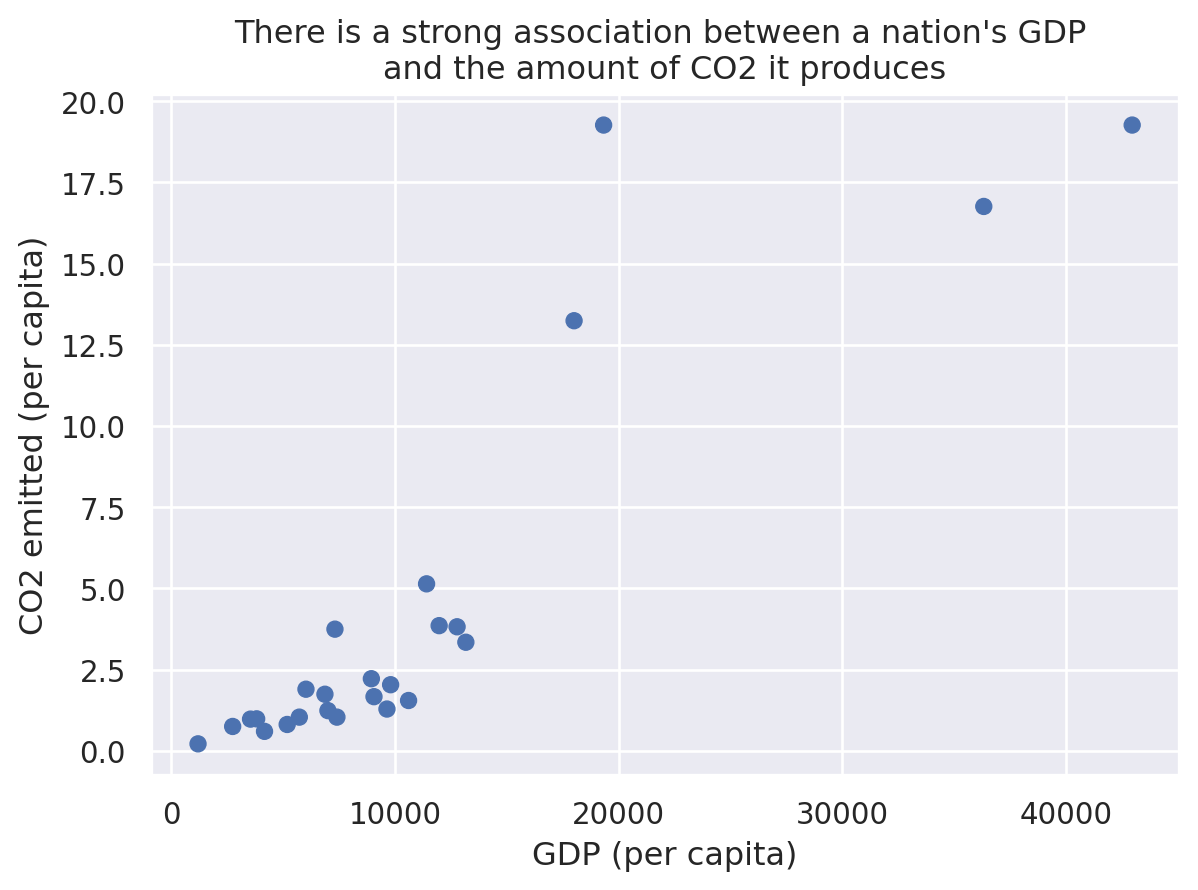

In [49]:
import seaborn.objects as so

(
    so.Plot(gapminder_co2, x="gdpPercap", y="per_capita")
    .add(so.Dot())
    .label(
        x="GDP (per capita)",
        y="CO2 emitted (per capita)",
        title="There is a strong association between a nation's GDP \nand the amount of CO2 it produces")
)

```r
ggplot(gapminder_co2, aes(x=gdpPercap, y=per_capita)) +
  geom_point() +
  labs(x="GDP (per capita)",
       y="CO2 emitted (per capita)",
       title="There is a strong association between a nation's GDP \nand the amount of CO2 it produces"
  ) +
  geom_smooth()
```

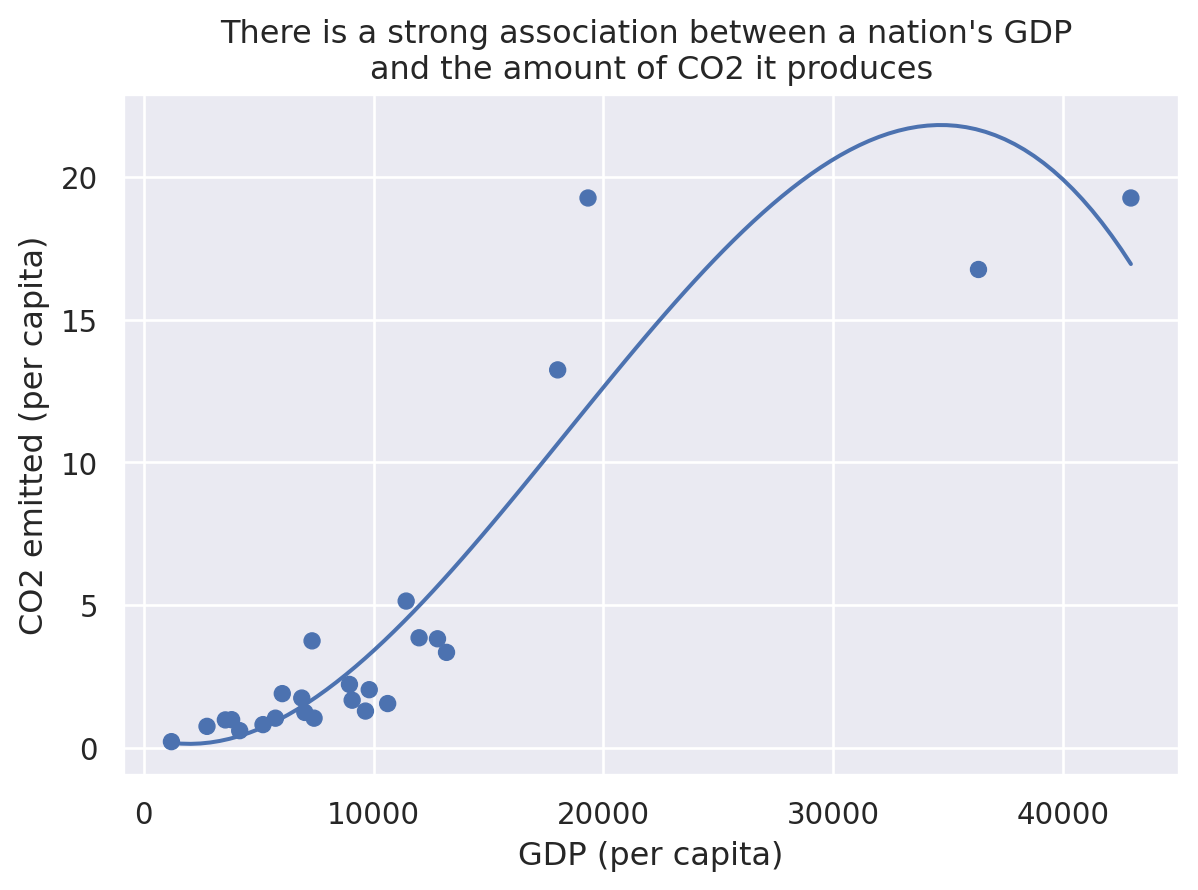

In [50]:
# THE SEABORN OBJECTS INTERFACE CURRENTLY DOES NOT HAVE LOESS SMOOTHING

(
    so.Plot(gapminder_co2, x="gdpPercap", y="per_capita")
    .add(so.Dot())
    .label(
        x="GDP (per capita)",
        y="CO2 emitted (per capita)",
        title="There is a strong association between a nation's GDP \nand the amount of CO2 it produces")
    .add(so.Line(), so.PolyFit(order=3))
)

```r
ggplot(gapminder_co2, aes(x=gdpPercap, y=per_capita)) +
  geom_point() +
  labs(x="GDP (per capita)",
       y="CO2 emitted (per capita)",
       title="There is a strong association between a nation's GDP \nand the amount of CO2 it produces"
  ) +
  geom_smooth(method="lm")
```

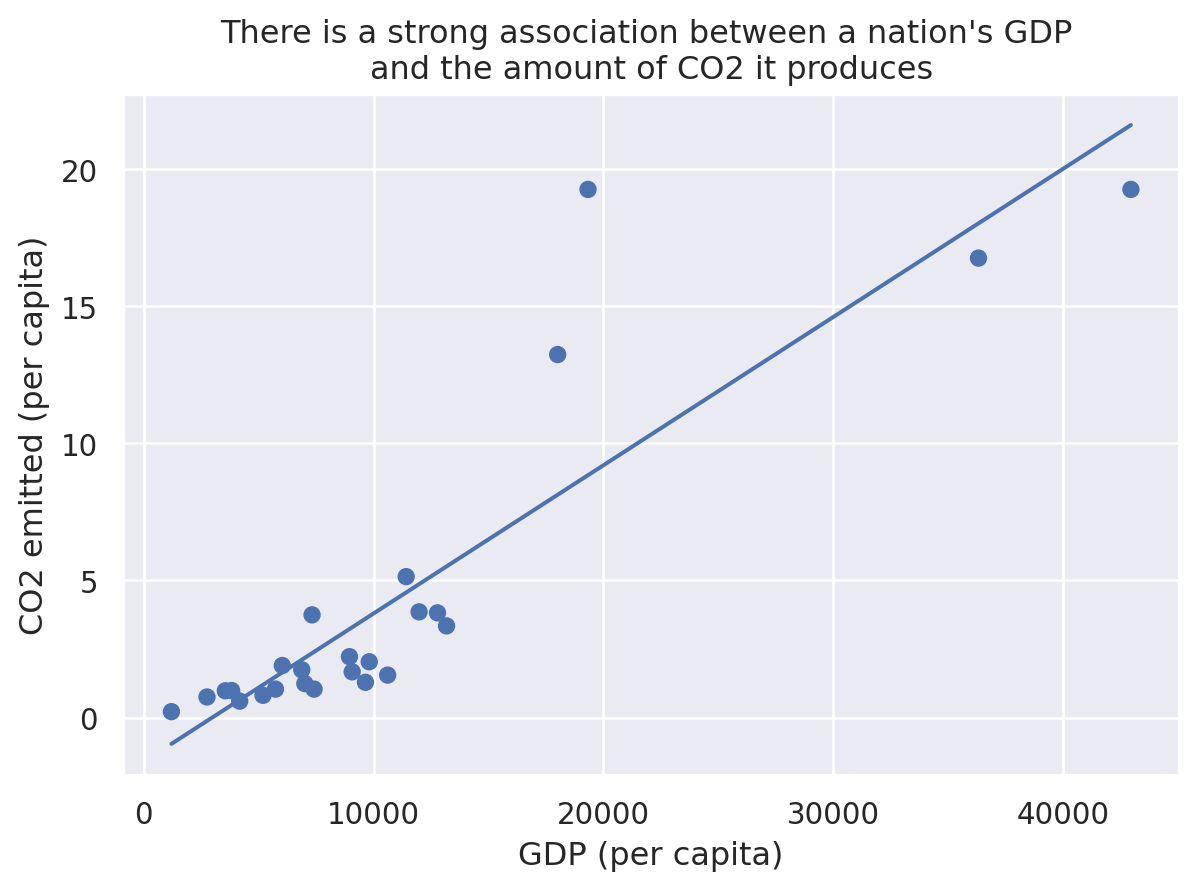

In [51]:
(
    so.Plot(gapminder_co2, x="gdpPercap", y="per_capita")
    .add(so.Dot())
    .label(
        x="GDP (per capita)",
        y="CO2 emitted (per capita)",
        title="There is a strong association between a nation's GDP \nand the amount of CO2 it produces")
    .add(so.Line(), so.PolyFit(order=1))
)

```r
gapminder_co2 %>%
  mutate(region = if_else(country == "Canada" |
                            country == "United States" |
                            country == "Mexico", "north", "south")) %>%
  group_by(region) %>%
  summarize(sumtotal = sum(total),
            sumpop = sum(pop))
```

In [52]:
print(
    gapminder_co2
    .groupby("region")
    .agg("sum", numeric_only=True)
    [["total", "pop"]]
)

               total           pop
region                            
north   1.235926e+07  1.552534e+13
south   8.893317e+05  3.892746e+12


```r
gapminder %>%
 filter(year==2007) %>%
 group_by(continent) %>%
 summarise(average= mean(lifeExp)) %>%
 arrange(desc(average))
```

In [53]:
print(
    gapminder
    .query("year==2007")
    .groupby("continent")["lifeExp"]
    .agg(mean="mean")
    .sort_values("mean", ascending=False)
)

                mean
continent           
Oceania    80.719500
Europe     77.648600
Americas   73.608120
Asia       70.728485
Africa     54.806038
